### naver 지식인에서 '' 검색
* 질문제목, 답변수 확인
* 10페이지(약 500개 답변)
* 답변 크롤링
* 답변 토큰화(okt로 명사만 추출)
* 워드크라우드

In [9]:
#한글 폰트 설치
# !apt-get install -y fonts-nanum > /dev/null
# !fc-cache -fv > /dev/null
# !rm -rf ~/.cache/matplotlib > /dev/null
!atp-get update -qq
!apt-get install -y fonts-nanum* -qq
#런타임 다시시작

'atp-get'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'apt-get'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [15]:
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from tqdm.notebook import tqdm
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from urllib.parse import quote


import re  # 정규표현식
import pandas as pd
from tqdm.notebook import tqdm
import time

from wordcloud import WordCloud, STOPWORDS
from PIL import Image  # 그림 불러오는 패키지
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import rcParams
rcParams['font.family'] = 'Malgun Gothic'


#NLTK Stopwords
from nltk.corpus import stopwords

In [13]:
# .. 검색조건 초기화
headers = {'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36'}
base_url = "https://kin.naver.com/search/list.naver?query="
driver = webdriver.Chrome()

# 검색 페이지 수 
p = [str(i+1) for i in range(11)]
   
# 리턴 리스트
line = []

In [14]:
for j in tqdm(range(len(p))):  # page loop
#for j in[0]:  # page loop

    # 메인 홈페이지
    url = f"{base_url}{quote('아내+결혼기념일+선물')}&page={p[j]}"
    driver.get(url)    
    time.sleep(2)

    # 페이지 소스
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    #print(soup)
    
    # .. 질문 리스트
    stn = soup.select('ul.basic1 > li')
    print(f'{p[j]} 페이지 질문리스트 개수: {len(stn)}')

    #for i in [0]: # 페이지당 각 질문 리스트 loop
    for i in range(len(stn)):

        # .. 질문 서브 페이지 접속
        # 서브 링크 추출
        sub_link = stn[i].select_one('a')['href']
        #print(sub_link)        

        # 서브 링크 접속
        driver.get(sub_link)
        time.sleep(2)

        # 현재버튼,전체버튼
        num_click = (int(driver.find_element(By.CSS_SELECTOR, '._answerCount.num').text)-1) // 5
        for k in range(num_click):
            driver.find_element(by=By.ID, value='nextPageButton').click()
            time.sleep(2)

        # 서브 링크 소스 
        html_sub = driver.page_source
        soup_sub = BeautifulSoup(html_sub, 'html.parser')
        #print(soup_sub)

        # 질문제목
        title = soup_sub.select_one('div.title').text.strip()
        print(title)
    
        # 답변 개수
        numq = soup_sub.select_one('em._answerCount').text.strip()
        print("답변개수: ", numq)
    
        # 답변 개수별 각 문장 추출
        inners = soup_sub.select('div.answer-content__item._contentWrap._answer')
        #print(len(inner_answ))
        for inner in inners:
            texts = inner.select('p.se-text-paragraph')         
            for text in texts:
                li = text.text
                if li == " " or li == '\u200b': continue
                line.append(li)
                #print(text.text)
        driver.back()
        time.sleep(2)

  0%|          | 0/11 [00:00<?, ?it/s]

1 페이지 질문리스트 개수: 10
아내 결혼기념일 선물 3주년입니다 뭐가 좋은가요??
답변개수:  11
결혼기념일 선물 추천좀요
답변개수:  12
아내결혼기념일선물 추천좀 부탁드려요!!
답변개수:  19
아내결혼기념일선물 어떤것이 좋을까요.
답변개수:  2
아내 결혼기념일 선물 고민과 걱정
답변개수:  2
아내 결혼기념일 선물 추천해주세요!
답변개수:  2
아내 결혼기념일 선물로 뭐가 좋을까요?
답변개수:  1
아내 결혼기념일 선물 추천 좀 부탁드려요
답변개수:  14
아내 결혼기념일 선물 급하게 찾아봅니다
답변개수:  2
아내 결혼기념일 선물 급합니다ㅠㅠ
답변개수:  1
2 페이지 질문리스트 개수: 10
아내 결혼기념일 선물 추천좀 부탁드립니다~
답변개수:  3
아내(와이프) 결혼기념일 선물, 알아보아요!
답변개수:  2
아내결혼기념일선물 추천해주세요 좀 감동받을만한 선물 없을까요? 뻔한 선물 말고 특별한 아내결혼기념일선물 추천 좀 부탁드려봅니다.
답변개수:  1
아내 결혼기념일 선물 좋은 것 없을까요?
답변개수:  1
아내결혼기념일선물 오늘준비 가능한 가성비좋은 선물이요.
답변개수:  2
아내 결혼기념일 선물
답변개수:  6
아내 결혼기념일 선물 추천해주세요
답변개수:  1
아내 결혼기념일 선물 뭐가 좋을까요?
답변개수:  7
결혼기념일 선물 아내에게..
답변개수:  1
아내에게 결혼기념일 선물로 꽃배달서비스 보낼껀데 어떤가요?
답변개수:  6
3 페이지 질문리스트 개수: 10
결혼기념일아내선물 어떤게 좋을지고민입니다.
답변개수:  7
아내 결혼기념일 선물 준비하려고 하는데요...40대중반 여자를 위해서 선물 할만한 거 좋은게 뭐있을까요?제 자랑같지만 꽃이나 화장품은 꼭 아내 결혼기념일 선물 아니어도평소에도 많이 주는 편이고,지금 고민중이긴 한데 영양제쪽으로 알아보고 있어요.아내가 그쪽에 관심도 많고 해서 영양제로올해 아내 결혼기념일 선물 줘도 좋아할것 같긴 한데어떤게 좋을지는 못정했네요.영양제류 중에 아내 결혼기념일 선물로 줄만한 것추천 좀 부탁합니다.


In [15]:
driver.close()
len(line)

2428

In [16]:
# 저장
with open('../daou/new_gift.txt', 'w', encoding='utf-8') as fp:
    for answer in line:
        fp.write(answer + '\n')

데이터 분석

In [4]:
with open('../daou/new_gift.txt', encoding='utf-8') as file:
    text = file.read()

In [5]:
#한글 형태소 분석기
from konlpy.tag import Okt, Kkma, Komoran
okt = Okt()
# kkma = Kkma()
# kr = Komoran()

In [6]:
# 명사 추출
tokens = okt.nouns(text)

In [7]:
tokens[:30]

['음',
 '아내',
 '결혼기념일',
 '선물',
 '아대',
 '하나',
 '좀',
 '아대',
 '아예',
 '육아',
 '안마',
 '기',
 '낫',
 '거',
 '남편',
 '저',
 '둘',
 '사용',
 '베개',
 '안마',
 '신용',
 '사용',
 '수',
 '꽤',
 '것',
 '집',
 '혹시',
 '안마',
 '기',
 '아내']

In [8]:
# 영문자, 숫자, 부호제거
import re
tokens = [re.sub('[^가-힣]', '', token) for token in tokens]

In [9]:
import nltk
nltk.download('punkt') #코랩에서는 매번 다운함 / 로컬에서는 한번만 실행

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tjoeun\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

다음 과정을 불용어 처리

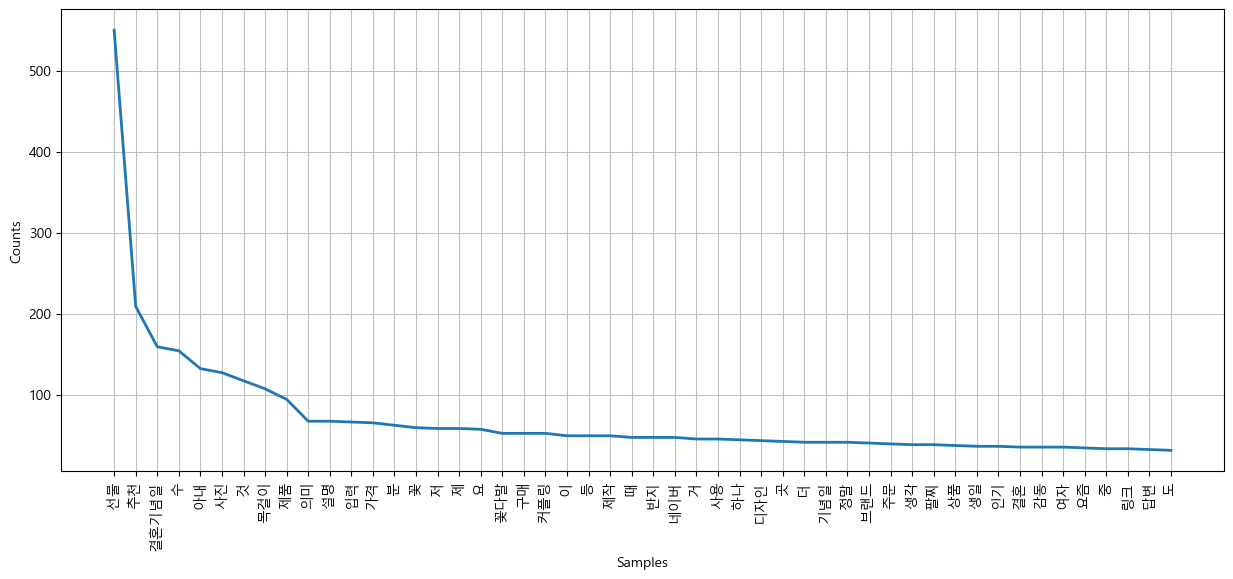

In [21]:
gift = nltk.Text(tokens, name = '결혼기념일선물')
plt.figure(figsize=(15,6))
gift.plot(50)
plt.show()

In [22]:
# 1차 불용어 
stoptext = '''
선물 추천 결혼기념일 수 아내 사진 것 제품 의미 설명 입력 가격 분 저 제 요 구매 이 등 제작 때 네이버 거 사용 하나 디자인 곳 더 기념일
정말 브랜드 주문 생각 생일 인기 결혼 감동 여자 요즘 중 링크 답변
'''

In [23]:
# 불용어 제거
stop_words = stoptext.split()
tokens = [token for token in tokens if token not in stop_words]

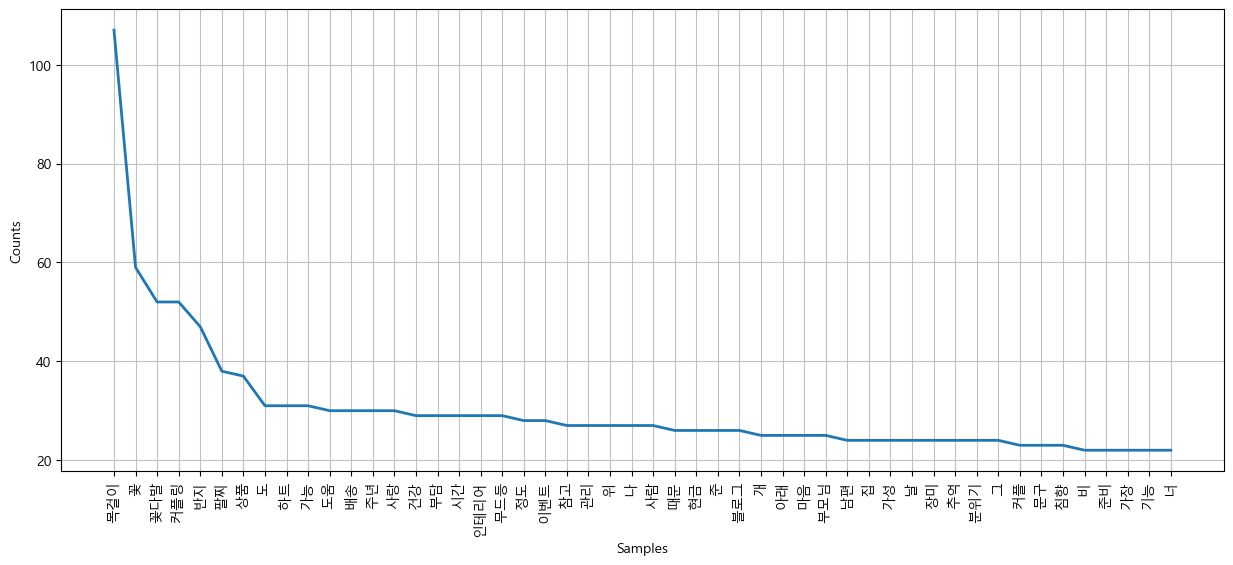

In [24]:
# 그래프에서 무의미한 토큰은 수동으로 불용처리하기 위해 그래프 시각화
gift = nltk.Text(tokens, name = '결혼기념일')
plt.figure(figsize=(15,6))
gift.plot(50)
plt.show()

In [28]:
# 2차 불용어 
stoptext = '''
선물 추천 결혼기념일 수 아내 사진 것 제품 의미 설명 입력 가격 분 저 제 요 구매 이 등 제작 때 네이버 거 사용 하나 디자인 곳 더 기념일
정말 브랜드 주문 생각 생일 인기 결혼 감동 여자 요즘 중 링크 답변 상품 도 하트 가능 도움 배송 주년 사랑 건강 부담 시간 인테리어 정도 이벤트
참고 관리 위 나 사람 때문 준 블로그 개 아래 마음 부모님 남편 집 가성 날 장미 추억 분위기 그 커플 문구 침향 비 준비 가장 기능 너
'''

In [29]:
# 불용어 제거
stop_words = stoptext.split()
tokens = [token for token in tokens if token not in stop_words]

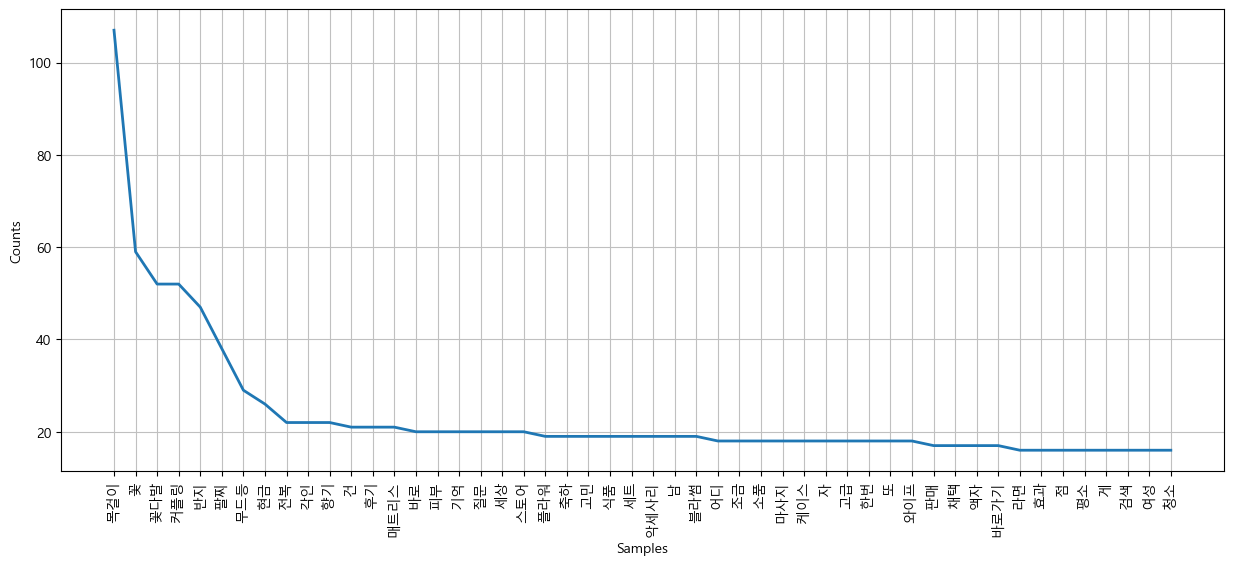

In [30]:
# 그래프에서 무의미한 토큰은 수동으로 불용처리하기 위해 그래프 시각화
gift = nltk.Text(tokens, name = '결혼기념일')
plt.figure(figsize=(15,6))
gift.plot(50)
plt.show()

In [31]:
stoptext = '''
선물 추천 결혼기념일 수 아내 사진 것 제품 의미 설명 입력 가격 분 저 제 요 구매 이 등 제작 때 네이버 거 사용 하나 디자인 곳 더 기념일
정말 브랜드 주문 생각 생일 인기 결혼 감동 여자 요즘 중 링크 답변 상품 도 하트 가능 도움 배송 주년 사랑 건강 부담 시간 인테리어 정도 이벤트
참고 관리 위 나 사람 때문 준 블로그 개 아래 마음 부모님 남편 집 가성 날 장미 추억 분위기 그 커플 문구 침향 비 준비 가장 기능 너
전복 각인 향기 건 후기 매트리스 바로 기억 질문 세상 스토어 플라워 축하 고민 세트 남 어디 블라썸 조금 소품 케이스 자 고급 한번 또 와이프
판매 채택 바로가기 라면 효과 점 평소 게 검색 여성 청소
'''

In [32]:
# 불용어 제거
stop_words = stoptext.split()
tokens = [token for token in tokens if token not in stop_words]

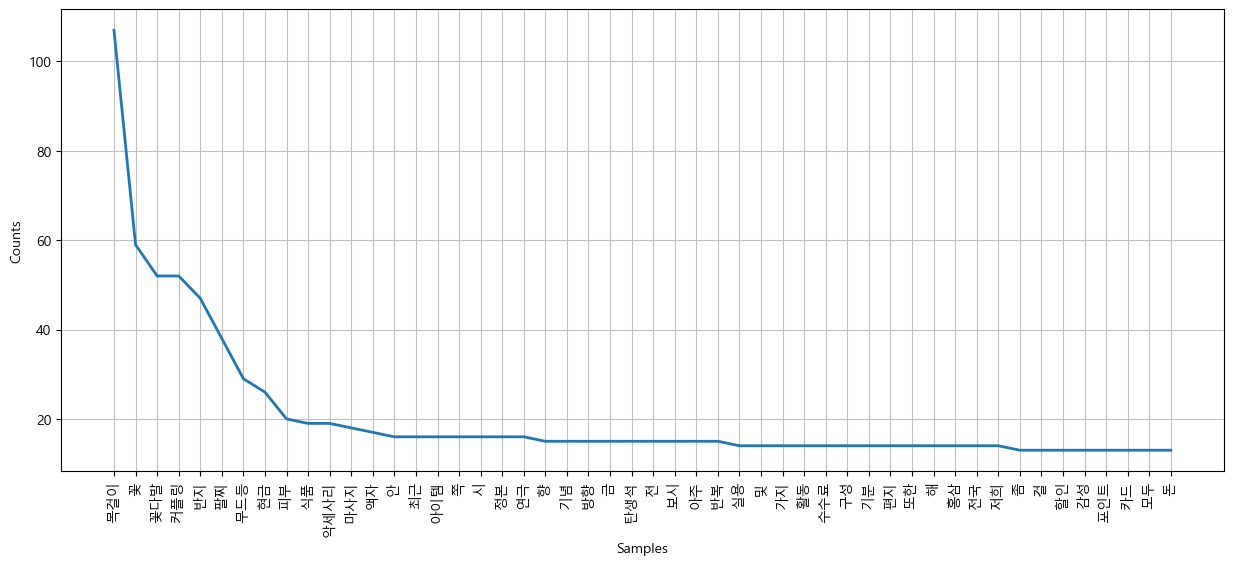

In [33]:
# 그래프에서 무의미한 토큰은 수동으로 불용처리하기 위해 그래프 시각화
gift = nltk.Text(tokens, name = '결혼기념일')
plt.figure(figsize=(15,6))
gift.plot(50)
plt.show()

워드크라우드 시각화

In [34]:
from wordcloud import WordCloud
from PIL import Image

In [35]:
data = gift.vocab().most_common(300)    # 빈도순으로 300개만 
fp = '../../한글글꼴/NanumGothic.ttf'
wc = WordCloud(font_path=fp, relative_scaling=0.2,
               background_color='white').generate_from_frequencies(dict(data))

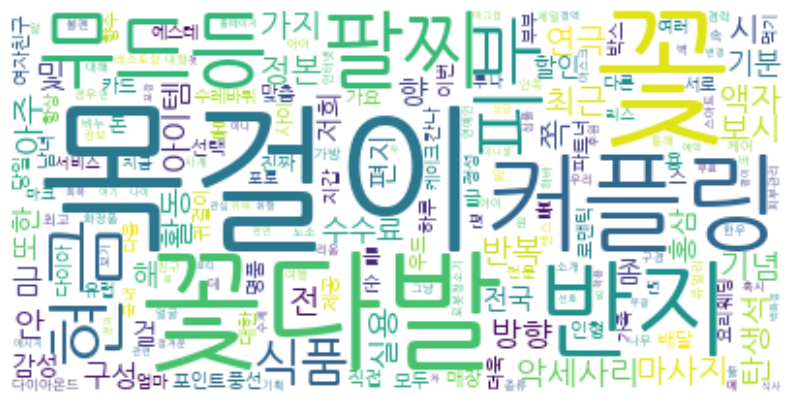

In [36]:
plt.figure(figsize=(10,6))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()